In [1]:
import math
import sys
sys.path.append('../../darknight/')
from fcts import array_in_nd_array, remove_space, r2pcorr,struc2mol
import numpy as np
import pandas as pd
import darkchem
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools,Draw
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
# load testing data
data = pd.read_excel('multiple_0.9_classify_1100.xlsx')

In [9]:
#remove the redundant space in the smiles string
data = remove_space(data)

In [10]:
# transform the data type to DataFrame 
rdata_df = {'smiles': data['Reactants']}
rdata_df = pd.DataFrame(data = rdata_df)
pdata_df = {'smiles': data['Products']}
pdata_df = pd.DataFrame(data = pdata_df)

In [11]:
#transform smiles strings to molecule structures
r_structure_df = struc2mol(rdata_df)
p_structure_df = struc2mol(pdata_df)

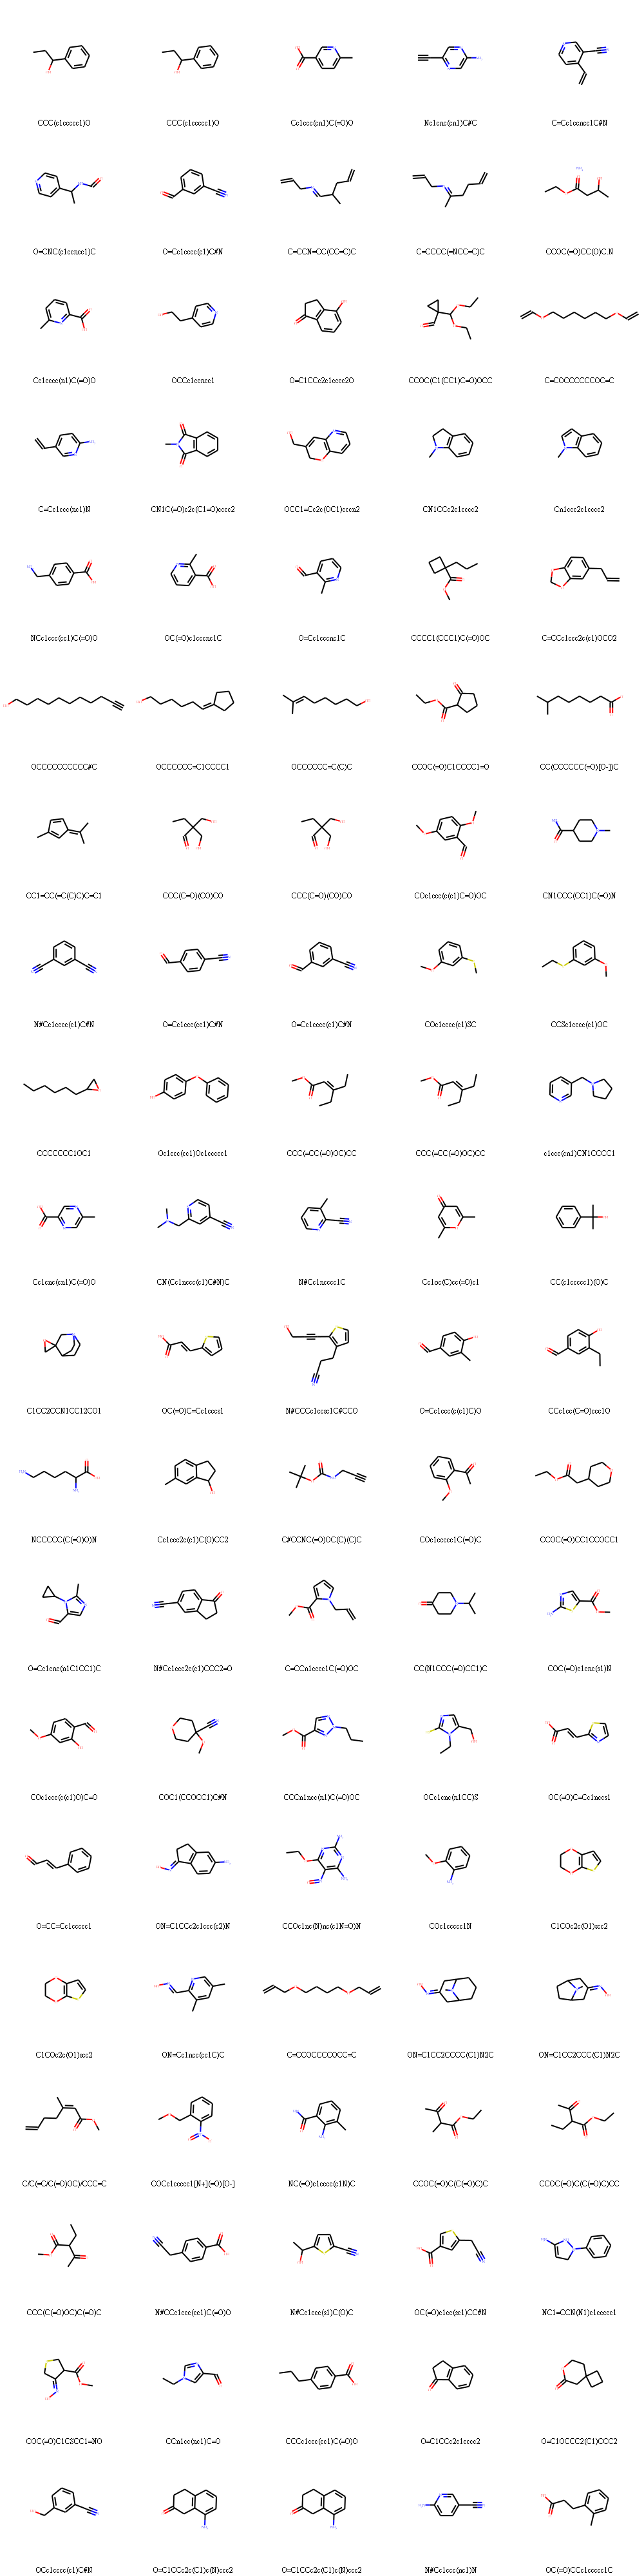

In [12]:
# display the products smiles strings with their molecule structures
display(PandasTools.FrameToGridImage(r_structure_df,column='mol', legendsCol='smiles',molsPerRow=5))


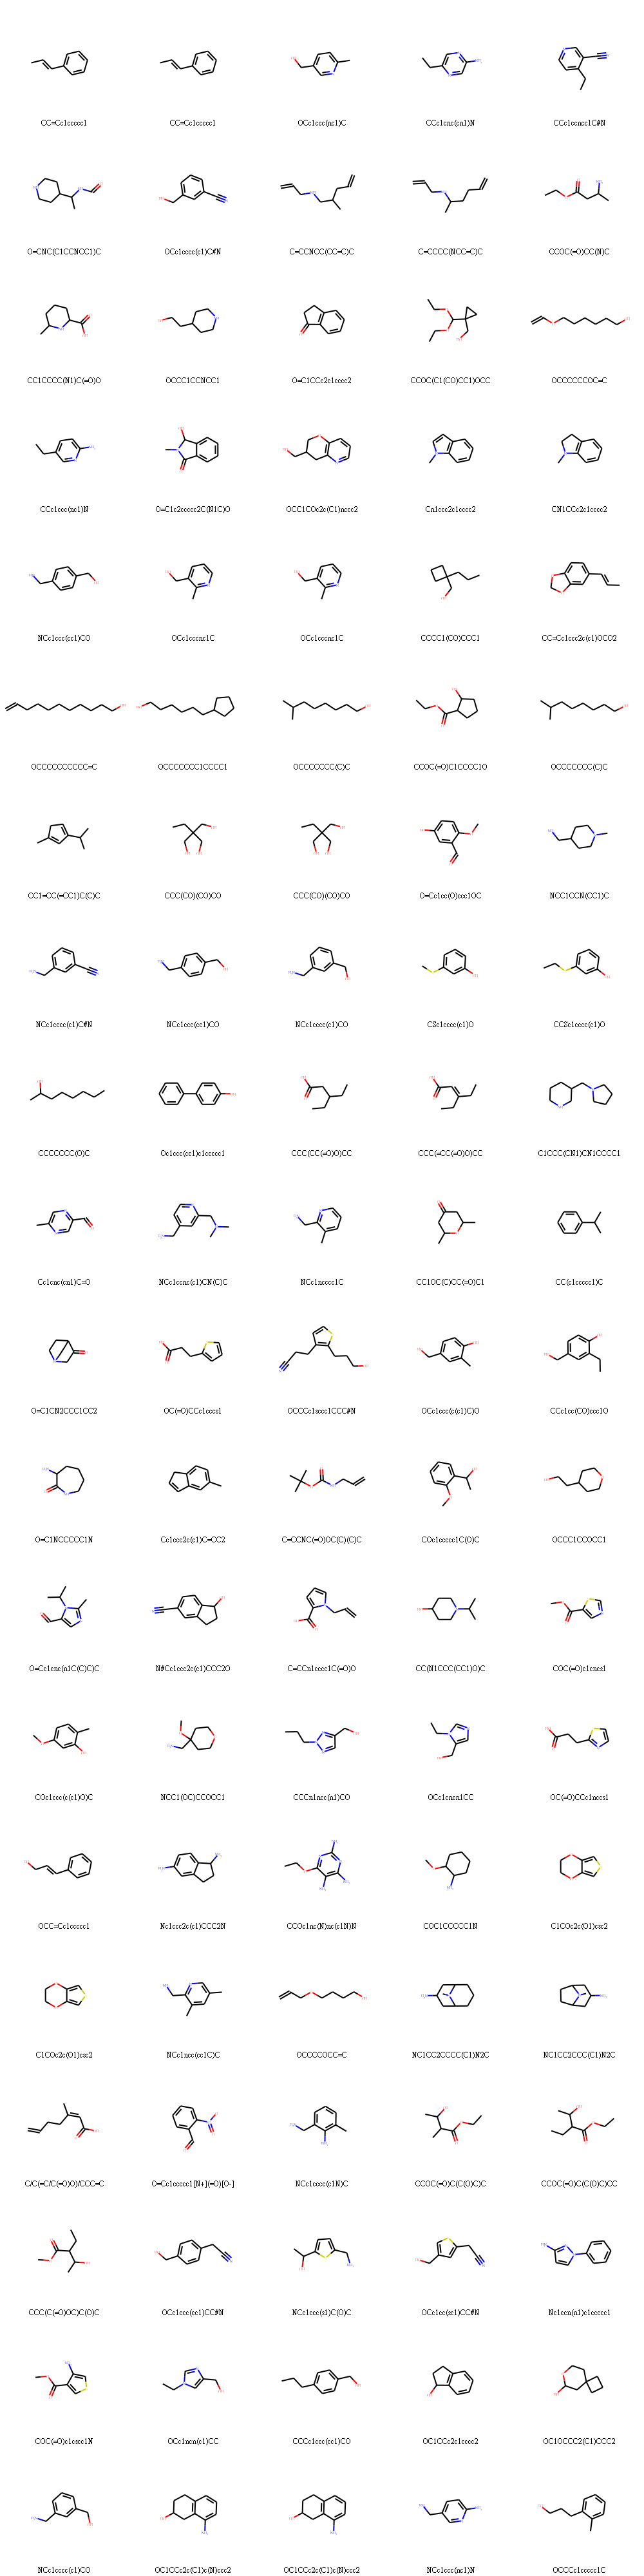

In [13]:
display(PandasTools.FrameToGridImage(p_structure_df,column='mol', legendsCol='smiles',molsPerRow=5))